In [129]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Example 1

In [130]:
def corrrelation(img1: np.ndarray, img2: np.ndarray):
    img1_vec = img1.flatten()
    img2_vec = img2.flatten()
    
    norm_func = lambda x: (x - np.mean(x)) / np.std(x)
    corr = np.mean((norm_func(img1_vec) * norm_func(img2_vec)))
    return corr
    

# Example 2

In [131]:

# def get_correlation_map(img: np.ndarray, template: np.ndarray):
#     height, width = image.shape
#     template_height, template_width = template.shape
#     dict_idx = dict()
#     for i in range(height - template_height+1):
#         for j in range(width - template_width+1):
#             corr = corrrelation(image[i:i+template_height, j:j+template_width], template)
#             if (corr > 0.8):
#                 dict_idx[((i,i+template_height), (j, j+template_width))] = corr
#     return dict_idx
           
            

In [132]:
# dict_idx = get_correlation_map(image_small, template)

In [133]:
# dict_idx

In [134]:

# # fig, ax = plt.subplots(1)
# # ax.imshow(image, cmap='gray')

# img_test = cv2.imread('./barton2-small.jpg')

# for rect, corr in dict_idx.items():
#     print(rect)
#     (start_y, end_y), (start_x, end_x) = rect
#     img_test = cv2.rectangle(img_test, (start_x, start_y), (end_x, end_y), (0, 0, 255), 2)
#     # ax.add_patch(rect_patch)
#     # ax.text(start_x, start_y, f'{corr:.2f}', color='r', fontsize=8, verticalalignment='bottom')

# plt.imshow(img_test)

In [135]:
def get_correlation_map(img: np.ndarray, template: np.ndarray):
    output_image = np.zeros(((img.shape[0] - template.shape[0]), (img.shape[1] - template.shape[1])))
    for i in range(output_image.shape[0]):
        for j in range(output_image.shape[1]):
            output_image[i, j] = corrrelation(img[i:(i + template.shape[0]), j:(j + template.shape[1])], template)

    return output_image

# Example 3

In [136]:
def find_matched(image: np.ndarray, corr_map: np.ndarray, template_size: tuple[int, int], threshold: float):
    location = np.where(corr_map > threshold)
    print(template_size)
    for x, y in list(zip(location[0], location[1])):
        image = cv2.rectangle(image, (y, x), (y + template_size[1], x + template_size[0]), (0, 0, 255), 2)
        # print((x, y), (x + template_size[0], y + template_size[1]))
    return image
    

# Example 4

In [137]:
def main():
    image = cv2.imread('./barton2.jpg')
    image_small = cv2.imread('./barton2-small.jpg')
    template = cv2.imread('./barton2-window.jpg', 0)
    
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_small_gray = cv2.cvtColor(image_small, cv2.COLOR_BGR2GRAY)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_small = cv2.cvtColor(image_small, cv2.COLOR_BGR2RGB)
    template_size = (template.shape[0], template.shape[1])
    threshold = 0.8
    
    image_corr_map = get_correlation_map(image_gray, template)
    image_match = find_matched(image, image_corr_map, template_size, threshold)
    
    image_small_corr_map = get_correlation_map(image_small_gray, template)
    image_small_match = find_matched(image_small, image_small_corr_map, template_size, threshold)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(image_match)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(image_small_match)
    plt.axis('off')
    
    plt.show()
    
    
    

C:\Users\DELL PRECISION 5530\AppData\Local\Temp\ipykernel_23416\316650471.py:5: RuntimeWarning: invalid value encountered in divide
  norm_func = lambda x: (x - np.mean(x)) / np.std(x)


(89, 75)
(89, 75)


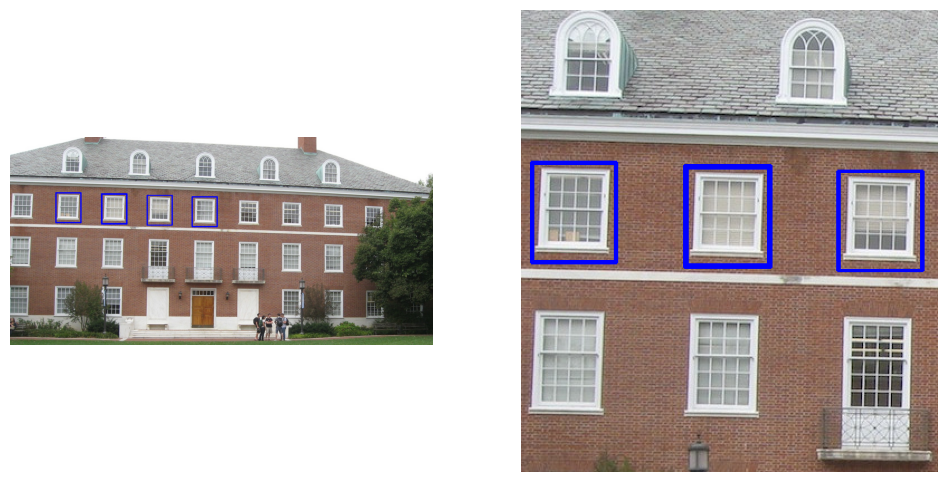

In [138]:
if __name__ == "__main__":
    main()